In [1]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

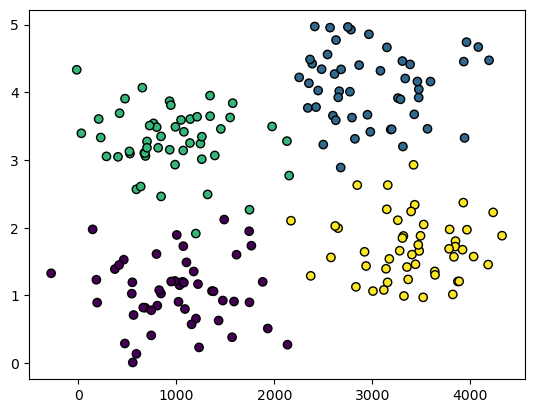

In [3]:
# Генерация данных
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                  centers=blob_centers, 
                  cluster_std=0.5,
                  random_state=0)

X[:, 0] *= 1000

# Визуализация данных
plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.show()

In [5]:
# Создание и обучение первой модели перцептрона
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

# Вывод весов модели
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [7]:
# Вывод весов по нейронам
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [9]:
# Вывод весов смещения
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


Матрица классификации:
[[ 0  0  0 50]
 [ 0  0  0 50]
 [ 0  0  0 50]
 [ 0  0  0 50]]


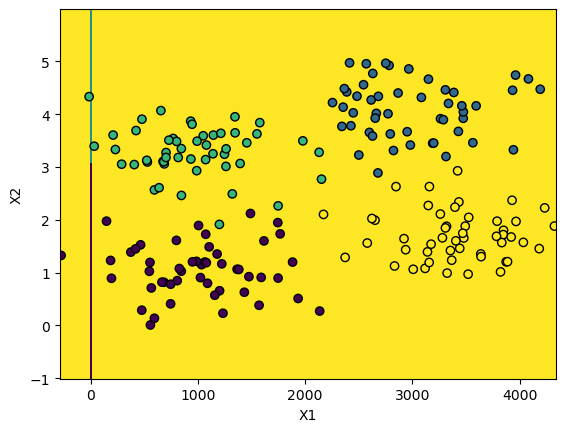

In [11]:
# Оценка модели
print("Матрица классификации:")
print(confusion_matrix(y, clf.predict(X)))

# Визуализация границ принятия решений
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

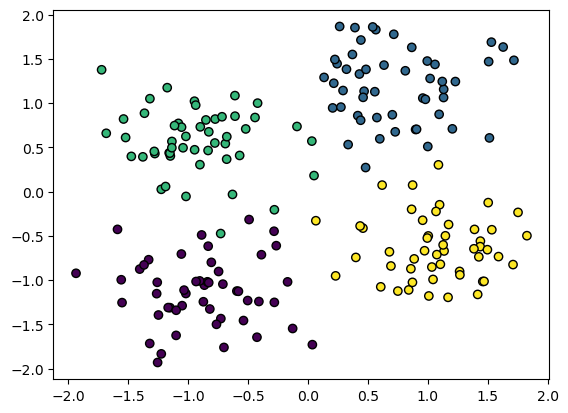

In [13]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Визуализация нормализованных данных
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.show()

Матрица классификации после нормализации:
[[22  0 11 17]
 [ 0 38  0 12]
 [ 0  3 45  2]
 [ 0  5  0 45]]


C:\Users\senpai_sqrt2\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


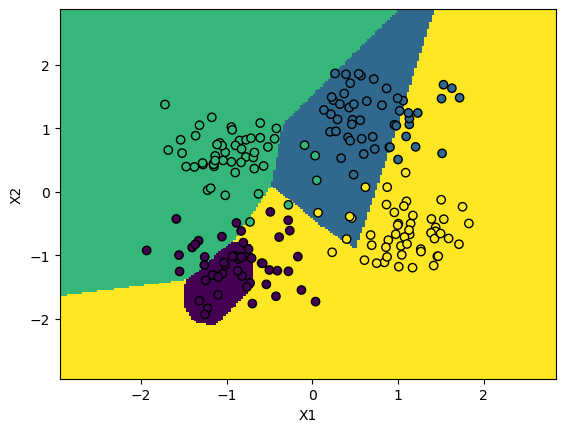

In [15]:
# Обучение модели на нормализованных данных
clf = MLPClassifier(hidden_layer_sizes=(6,), random_state=1).fit(X_scaled, y)

# Оценка модели
print("Матрица классификации после нормализации:")
print(confusion_matrix(y, clf.predict(X_scaled)))

# Визуализация границ принятия решений
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Iteration 1, loss = 1.47183879
Iteration 2, loss = 1.46880010
Iteration 3, loss = 1.46578493
Iteration 4, loss = 1.46278442
Iteration 5, loss = 1.45979895
Iteration 6, loss = 1.45682995
Iteration 7, loss = 1.45387205
Iteration 8, loss = 1.45093006
Iteration 9, loss = 1.44800041
Iteration 10, loss = 1.44508088
Iteration 11, loss = 1.44217231
Iteration 12, loss = 1.43927636
Iteration 13, loss = 1.43639022
Iteration 14, loss = 1.43351232
Iteration 15, loss = 1.43064750
Iteration 16, loss = 1.42779721
Iteration 17, loss = 1.42495753
Iteration 18, loss = 1.42212842
Iteration 19, loss = 1.41930986
Iteration 20, loss = 1.41650184
Iteration 21, loss = 1.41370540
Iteration 22, loss = 1.41092282
Iteration 23, loss = 1.40814924
Iteration 24, loss = 1.40538522
Iteration 25, loss = 1.40263158
Iteration 26, loss = 1.39988828
Iteration 27, loss = 1.39715907
Iteration 28, loss = 1.39444452
Iteration 29, loss = 1.39174602
Iteration 30, loss = 1.38905569
Iteration 31, loss = 1.38637463
Iteration 32, los

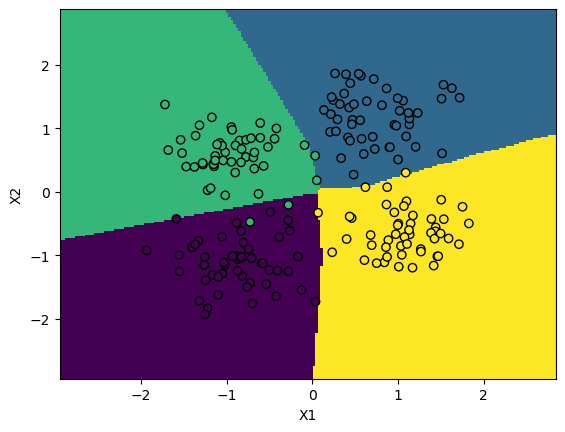

In [17]:
# Увеличение количества итераций
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10000, verbose=True).fit(X_scaled, y)

# Оценка модели
print("Матрица классификации после увеличения итераций:")
print(confusion_matrix(y, clf.predict(X_scaled)))

# Визуализация границ принятия решений
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

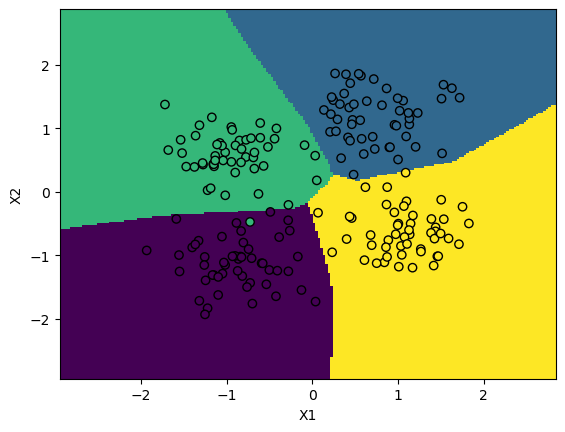

In [19]:
# Создание глубокой нейронной сети
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10000).fit(X_scaled, y)

# Визуализация границ принятия решений
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()